In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [73]:
titanic_df = pd.read_csv("titanic_train.csv")
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [74]:
## 학습 데이터 정도
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [75]:
titanic_df.isna().sum() # null 값이 많구먼 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [76]:
# NULL 처리 
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace = True) # 평균으로 null 값 변경
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True) # 나머지는 N으로 변경
titanic_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [77]:
print(titanic_df['Sex'].value_counts())
print(titanic_df['Cabin'].value_counts())
print(titanic_df['Embarked'].value_counts())

male      577
female    314
Name: Sex, dtype: int64
N              687
G6               4
C23 C25 C27      4
B96 B98          4
F2               3
              ... 
C106             1
D45              1
B50              1
B78              1
C103             1
Name: Cabin, Length: 148, dtype: int64
S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [78]:
# Cabin 은 선실의 번호로 부자와 가낭한 사람들을 나눌 수 있으므로,  앞 문자만 추출
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1] 
titanic_df['Cabin'].head()

0    N
1    C
2    N
3    C
4    N
Name: Cabin, dtype: object

#### 성별에 따른 생존률 

In [79]:
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count() # 0 사망 , 1 생존 

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

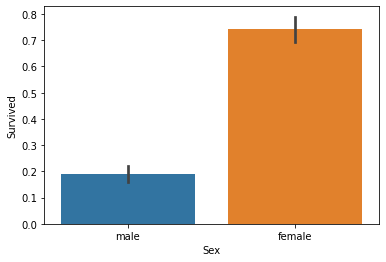

In [80]:
sns.barplot(x='Sex', y = 'Survived', data = titanic_df)

#### 성별 + 객실 등급
- 일등실, 이등실, 삼등실 순

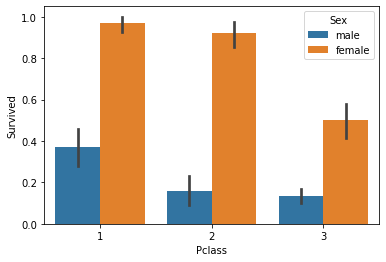

In [81]:
sns.barplot(x='Pclass',y='Survived', hue='Sex', data=titanic_df)

##### 삼등실의 경우 생존 확률이 상대적으로 많이 떨어지며, 남성의경우 일등식 생종률이 월등히 높다. 

#### Age 범위별로 카테고리 

In [82]:
# 입력 age 에 따라 구분 값을 반환하는 함수 설정. DataFrame의 apply lambda 식 사용. 

def get_category(age):
    cat=''
    if age <= -1  : cat = 'Unknown' # 1 보다 작으면 오류 값으로 분류
    elif age <= 5: cat = 'Baby'
    elif age <=12: cat = 'Child'
    elif age <=18: cat = 'Teenager' 
    elif age <=25: cat = 'Student'
    elif age <=35: cat = 'Young Adult'
    elif age <=60: cat = 'Adult'
    else : cat = 'Elderly'
        
    return cat

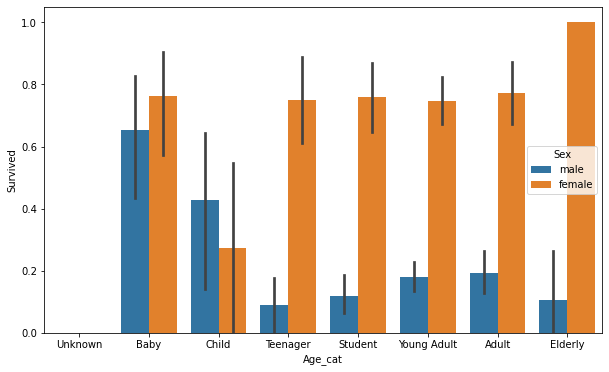

In [83]:
plt.figure(figsize=(10,6))
group_names = ['Unknown', 'Baby', 'Child','Teenager' , 'Student', 'Young Adult', 'Adult', 'Elderly' ] 

# lambda 식에 위에서 생성한 get_category() 함수를 반환갑으로 지정. 
# get_category(X) 는 입력가븡로 'Age' 칼럼 값을 받아서 해당하는 cat 반환

titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue = 'Sex', data= titanic_df, order = group_names)
titanic_df.drop('Age_cat', axis = 1, inplace=True)

#### 분석의 결과 Sex, Age, PClass 등이 중요하게 생존을 좌우하는 피처임을 확인!!

#### 문자열 카테고리 -> 숫자형 카테고리 피처로 변환 
- 인코딩은 사이킷런 LabelEncoder 클래스 사용

In [84]:
from sklearn import preprocessing

def encoding_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le. transform(dataDF[feature])
    
    return dataDF    

titanic_df = encoding_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


#### 전처리 


In [102]:
# Null 처리 합수 

def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace = True)
    df['Cabin'].fillna('N', inplace = True)
    df['Embarked'].fillna('N', inplace = True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러니 알괴즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)
    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df    

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [103]:
# 원본 데이터를 재로딩 하고, 피처 데이터 세트와 레이블 데이터 세트 추출

titanic_df = pd.read_csv('titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)

X_titanic_df = transform_features(X_titanic_df)

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(X_titanic_df , y_titanic_df, 
                                                      test_size=0.2, random_state=11)

#### 결정트리, 랜덤포레스트, 로지스틱 회귀 이용해서 예측

In [110]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [116]:
# 결정 트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(random_state=11)

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가 
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도: {0:4f}'.format(accuracy_score(y_test, rf_pred)))


# LogisticRegression 학습/예측/평가 
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:4f}'.format(accuracy_score(y_test,lr_pred)))

DecisionTreeClassifier 정확도: 0.787709
RandomForestClassifier 정확도: 0.854749
LogisticRegression 정확도: 0.849162


C:\Users\rmafu\.conda\envs\env_cpu\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [118]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv= 5)
for iter_count,accuracy in enumerate(scores):
    print('교차 검증 {0} 정확도 : {1:4f}'.format(iter_count,accuracy))
    
print('평균 정확도 ; {0:4f}'.format(np.mean(scores)))    

교차 검증 0 정확도 : 0.743017
교차 검증 1 정확도 : 0.775281
교차 검증 2 정확도 : 0.792135
교차 검증 3 정확도 : 0.786517
교차 검증 4 정확도 : 0.842697
평균 정확도 ; 0.787929
